In [1]:
import numpy as np 

pygame 2.6.0 (SDL 2.28.4, Python 3.9.13)
Hello from the pygame community. https://www.pygame.org/contribute.html

MESSAGE: Pygame initialized for simulation.

########## Simulation state - INI ###########

# solutions # : EMPTY 

# sensors # : 20

 ------  parameters ------  

# contact hurt (training agent) # : player

multiple mode: no

enemies list: 2

current enemy: 2

player mode: ai

enemy mode: static

level: 2

clock precision: low

inputs coded: no

random initialization: no

expiration time: 3000

speed: fastest

load player: yes

load enemy: yes

sound: off

overture time: 100

logs: on

save logs: yes

########## Simulation state - END ###########
Starting Genetic Algorithm Optimization...
gen	nevals	avg    	std    	min     	max   
0  	0     	13.1836	33.6701	-6.39693	92.647
1  	46    	31.6944	38.552 	-6.40523	92.647
2  	56    	49.2281	38.7439	-6.00881	92.647
3  	52    	65.4072	33.9971	-6.29157	92.647
4  	61    	56.8151	38.765 	-5.90808	92.647
5  	51    	65.0435	34.4647	-5.9

C:\Users\liaojw\Documents\study\course\Evolutionary Computing\assignment1\evoman_framework_group24\venv\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\liaojw\Documents\study\course\Evolutionary Computing\assignment1\evoman_framework_group24\venv\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg   	std    	min     	max    
0  	0     	8.1418	27.2715	-6.56103	91.7248
1  	64    	23.0416	34.805 	-6.38856	91.4906
2  	68    	41.8294	38.2036	-6.40523	91.4906
3  	61    	53.467 	38.5328	-6.30262	91.4906
4  	58    	68.9447	31.2861	-6.00389	93.2028
5  	71    	63.6154	35.221 	-6.42972	92.4512
6  	53    	66.7135	36.7196	-6.30628	92.447 
7  	55    	73.6591	31.3753	-6.41836	92.447 
8  	43    	76.785 	29.1553	-5.8861 	92.647 
9  	61    	74.3973	32.0299	-5.90808	92.647 
10 	64    	70.8176	33.1016	-6.39359	92.6906
11 	71    	71.2628	32.2674	-5.90808	92.647 
12 	66    	71.8986	34.2217	-5.90808	92.647 
13 	44    	74.9673	32.6007	-6.39526	92.647 
14 	59    	72.5294	35.0133	-6.32077	93.3362
15 	58    	75.6571	32.1428	-5.91889	93.3362
16 	58    	69.2736	36.102 	-5.81711	93.3362
17 	54    	80.4886	27.0238	-6.00881	93.3362
18 	63    	75.2982	32.8272	-5.79606	93.3362
19 	55    	79.1908	28.3528	-6.39359	93.3362
20 	71    	76.4101	29.2206	-5.79606	93.3362
21 	70    	76.6887	26.7761	-5.9108

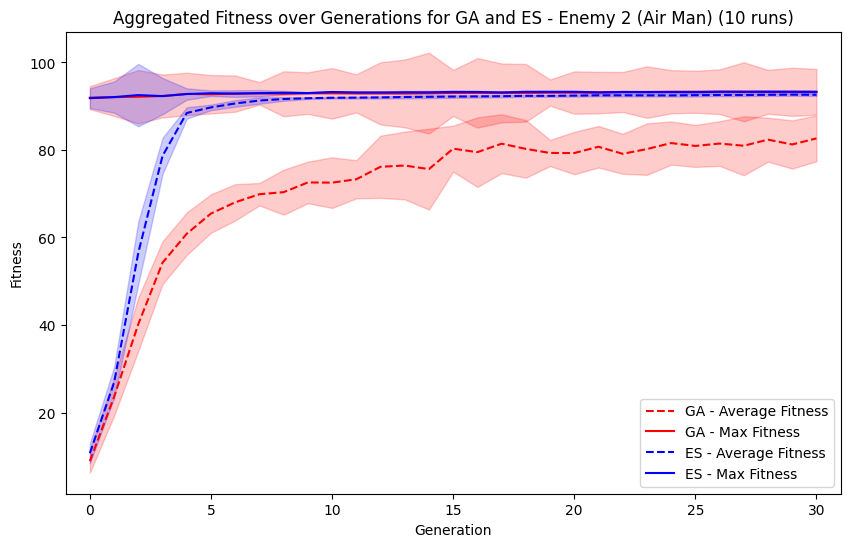

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import os
import re
from training_specialist_jiawei import EvolutAlgorithmOptimizer  # 导入类 


def run_optimizer(mode):

    # Set headless mode for faster experiments
    headless = True
    if headless:
        os.environ["SDL_VIDEODRIVER"] = "dummy"

    experiment_name = 'optimization_test'
    enemies = [2]
    n_hidden_neurons = 10
    n_population = 100
    n_generations = 30
    mutation_rate = 0.2
    sigma = 0.1

    optimizer = EvolutAlgorithmOptimizer(experiment_name, enemies, n_hidden_neurons, n_population, n_generations,
                                         mutation_rate, sigma, mode=mode)
    stats_path = optimizer.execute()

    if os.path.exists(stats_path):
        return stats_path
    else:
        raise Exception(f"Could not find stats.txt path for {mode}")

def aggregate_stats(mode, runs):
    all_data = []
    for _ in range(runs):
        stats_path = run_optimizer(mode)
        data = np.genfromtxt(stats_path, skip_header=1)
        all_data.append(data)

    all_data = np.array(all_data)
    mean_data = np.mean(all_data, axis=0)
    std_data = np.std(all_data, axis=0)

    aggregated_data = np.column_stack(
        (mean_data[:, 0], mean_data[:, 1], mean_data[:, 2], std_data[:, 1], std_data[:, 2]))
    return aggregated_data

def plot_aggregated_stats(aggregated_data_1, aggregated_data_2, num_runs):
    generations_1 = aggregated_data_1[:, 0]
    avg_fitness_1 = aggregated_data_1[:, 1]
    max_fitness_1 = aggregated_data_1[:, 2]
    std_dev_1 = aggregated_data_1[:, 3]

    generations_2 = aggregated_data_2[:, 0]
    avg_fitness_2 = aggregated_data_2[:, 1]
    max_fitness_2 = aggregated_data_2[:, 2]
    std_dev_2 = aggregated_data_2[:, 3]

    plt.figure(figsize=(10, 6))

    # Plot EA1 (GA)
    plt.plot(generations_1, avg_fitness_1, label='GA - Average Fitness', color='red', linestyle='--')
    plt.fill_between(generations_1, avg_fitness_1 - std_dev_1, avg_fitness_1 + std_dev_1, color='red', alpha=0.2)
    plt.plot(generations_1, max_fitness_1, label='GA - Max Fitness', color='red')
    plt.fill_between(generations_1, max_fitness_1 - std_dev_1, max_fitness_1 + std_dev_1, color='red', alpha=0.2)

    # Plot EA2 (ES)
    plt.plot(generations_2, avg_fitness_2, label='ES - Average Fitness', color='blue', linestyle='--')
    plt.fill_between(generations_2, avg_fitness_2 - std_dev_2, avg_fitness_2 + std_dev_2, color='blue', alpha=0.2)
    plt.plot(generations_2, max_fitness_2, label='ES - Max Fitness', color='blue')
    plt.fill_between(generations_2, max_fitness_2 - std_dev_2, max_fitness_2 + std_dev_2, color='blue', alpha=0.2)

    plt.title('Aggregated Fitness over Generations for GA and ES - Enemy 2 (Air Man) ({} runs)'.format(num_runs))
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.legend()
    plt.grid(False)
    plt.xlim(min(generations_1.min(), generations_2.min()) - 1, max(generations_1.max(), generations_2.max()) + 1)
    plt.savefig('aggregated_fitness_comparison_enemy_2_air_man.png')
    plt.show()

if __name__ == "__main__":
    num_runs = 10

    aggregated_data_1 = aggregate_stats("GA", num_runs)

    aggregated_data_2 = aggregate_stats("ES", num_runs)

    plot_aggregated_stats(aggregated_data_1, aggregated_data_2, num_runs)


In [3]:
enemies_list=[[i] for i in range(1,9)]
enemies_list

[[1], [2], [3], [4], [5], [6], [7], [8]]

In [4]:
np.random.randint(1,1000)

516